In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import plotly.express as px
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None) #Configuro Pandas para ver todas las columnas

In [3]:
df = pd.read_excel("../data (archivos del codigo principal)/dp2015-13_Dataset.xls")

In [4]:
df.head()

City   City_Eng City_Short   NAds  Price_Median   Price_Mean  \
0  Amsterdam  Amsterdam        AMS   9520   3419.972640  3426.322536   
1     Athina     Athens        ATH  10782   2064.004096  2109.106052   
2  Barcelona  Barcelona        BCN   5479   3140.000000  3267.621000   
3    Beograd   Belgrade        BEG  12797   1416.666667  1466.117265   
4     Berlin     Berlin        BER  16772   2150.338326  2313.968040   

   Area_Median  Area_Mean  Room_Median  Room_Mean  Euro_area  EU  Population  \
0         71.0  75.299475          3.0   2.838340          1   1      747093   
1         76.0  77.163884          3.0   2.870339          1   1      796442   
2         77.0  80.772769          3.0   2.794853          1   1     1615908   
3         58.0  60.236618          2.0   2.325467          0   0     1275000   
4         75.0  82.349263          2.5   2.579394          1   1     3431675   

   City_Area       Density        GDP_PC    GDP_PC_PPS    GDP_PC2008  \
0     165.90   4503.273056  49900.000000  49900.000000  55200.000000   
1     358.60   2220.976018  31900.000000  31900.000000  25400.000000   
2     100.10  16142.937063  30800.000000  30800.000000  28100.000000   
3     391.81   3254.128276   8453.264423  12037.008809   8453.264423   
4     892.00   3847.169283  24400.000000  24400.000000  26295.000000   

     GDP_PC2009    GDP_PC2010  Gini        HOR  Kearny_GCI2010   LRIR  \
0  52760.220994  53980.110497  25.5  21.000000            2.54   4.86   
1  25154.589372  24663.768116  32.9  51.900000            0.00   4.62   
2  27003.360098  27133.452691  33.0  68.100000            2.57   2.87   
3   7077.648127   7997.869718  28.2  97.424385            0.00  11.66   
4  26741.000000  27499.000000  30.0  12.800000            3.03   3.77   

   Inflation2010  Inflation2011      URate  MIR2009  MIR2010  Mortgage_PC2010  \
0       0.900000       2.500000   5.806452     5.26     4.57            38.01   
1       4.700000       3.100000  10.945455     3.41     3.79             7.12   
2       2.000000       3.100000  11.561947     2.52     2.54            14.79   
3      10.244648       7.004161  13.800000      NaN      NaN              NaN   
4       1.200000       2.500000  14.484000     4.29     3.70            14.09   

   Tppl1989_1993  Tppl1994_1998  Tppl1999_2002  Tppl2003_2006  Tppl2007_2009  \
0       702444.0       718119.0       734594.0       739104.0       747093.0   
1       772072.0       780572.0       789166.0       796442.0            NaN   
2      1643542.0      1508805.0      1503884.0      1578546.0      1615908.0   
3            NaN            NaN            NaN            NaN            NaN   
4      3465748.0      3458760.0      3388434.0      3387828.0      3431675.0   

   GDP_PC_PPS1989_1993  GDP_PC_PPS1994_1998  GDP_PC_PPS1999_2002  \
0                  NaN              28600.0              39400.0   
1                  NaN              13400.0              22000.0   
2                  NaN              17200.0              23400.0   
3                  NaN                  NaN                  NaN   
4                  NaN              19400.0              20900.0   

   GDP_PC_PPS2003_2006  GDP_PC_PPS2007_2009     CITIES  DemoDepend1989_1993  \
0              44800.0              49900.0  Amsterdam                 51.3   
1              27800.0              31900.0     Athina                 60.7   
2              25800.0              30800.0  Barcelona                 65.3   
3                  NaN                  NaN        NaN                  NaN   
4              21500.0              24400.0     Berlin                 51.9   

   DemoDepend1994_1998  DemoDepend1999_2002  DemoDepend2003_2006  \
0                 49.8                 48.4                 48.2   
1                 56.1                 52.0                 49.7   
2                 63.3                 61.7                 58.7   
3                  NaN                  NaN                  NaN   
4                 50.7        

In [5]:

df.columns


Index(['City', 'City_Eng', 'City_Short', 'NAds', 'Price_Median', 'Price_Mean',
       'Area_Median', 'Area_Mean', 'Room_Median', 'Room_Mean',
       ...
       'Longitude_deg', 'Longitude_min', 'Longitude_sec', 'Lat', 'Lon',
       'Liveability2010', 'Mercer_Qual_Liv2011', 'Mercer_Per_Safe2011',
       'ECM2010', 'ECM_Cost2010'],
      dtype='object', length=184)

In [6]:
'El dataset tiene {} filas y {} columnas.'.format(df.shape[0],df.shape[1])

'El dataset tiene 50 filas y 184 columnas.'

| **Columna**                                      | **Significado**                                                                                                          | **Acci√≥n**                                                            | **Importancia Inicial** |
|--------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------|-------------------------|
| **City** y **City_Eng**                          | Nombre de la ciudad en idioma local e ingl√©s.                                                                           | Eliminar City y cambiar el nombre de **City_Eng** a **City**           | 0                       |
| **City_Short**                                   | C√≥digo de la ciudad.                                                                                                     | Eliminar.                                                             | -                       |
| **NAds**                                         | N√∫mero de anuncios publicados de apartamentos.                                                                          | Retener para an√°lisis.                                                | -                       |
| **Price_Median** y **Price_Mean**                | Precio mediano y medio por m¬≤.                                                                                           | Usar para an√°lisis econ√≥mico y de precios (usar **Price Mean**).       | 1                       |
| **Area_Median** y **Area_Mean**                  | Mediana y media del √°rea total del apartamento.                                                                          | Retener para an√°lisis de tama√±o.                                      | 2                       |
| **Room_Median** y **Room_Mean**                  | Mediana y media del n√∫mero de habitaciones.                                                                              | Retener para estad√≠sticas de habitaciones.                            | 2                       |
| **Euro_area** y **EU**                           | **Euro Area**: pa√≠ses que usan el euro. **EU**: todos los estados miembros, ya sea que usen o no el euro.                 | -                                                                      | 1                       |
| **Population**, **City_Area** y **Density**      | Poblaci√≥n, √°rea (km¬≤) y densidad (personas/km¬≤) de la ciudad.                                                            | Usar para an√°lisis demogr√°fico.                                       | 1                       |
| **GDP_PC**, **GDP_PC_PPS**, **GDP_PC2008**,      | **GDP_PC**: Producto Interno Bruto per c√°pita. **GDP_PC_PPS**: Producto Interno Bruto per c√°pita ajustado por el poder    | Elimino GDP_PC_PPS, GDP_PC2008, GDP_PC2009 y GDP_PC2010.               | 1                       |
| **GDP_PC2009**, **GDP_PC2010**                   | de compra.                                                                                                               | Usar **GDP_PC** para an√°lisis econ√≥mico y de precios.                 |                         |
| **Gini**                                         | El coeficiente de Gini mide la desigualdad en el ingreso, con 0% reflejando igualdad perfecta y 100% m√°xima desigualdad. | -                                                                      | 3                       |
| **HOR**                                          | Homeownership rate (Tasa de propiedad de vivienda): porcentaje de hogares propietarios de la vivienda en la que viven.   | -                                                                      | 1                       |
| **Kearny_GCI2010**                               | Kearney‚Äôs Global Cities Index: √≠ndice que clasifica ciudades por su capacidad para ser relevantes y competitivas a nivel | -                                                                      | 3                       |
|                                                  | global.                                                                                                                 |                                                                        |                         |
| **LRIR**, **MIR2009**, **MIR2010**               | **LRIR**: Long-Run Interest Rate (Tasa de inter√©s a largo plazo). **MIR**: Mortgage Interest Rate (Tasa de inter√©s       | -|3|                                                                



**Valores nulos y duplicados**

In [9]:
lista_col_con_nulos = []
lista_col_20_nulos= []

for col in df:
    sum_nulls = df[col].isnull().sum() / len(df) * 100
    if sum_nulls != 0:
        lista_col_con_nulos.append(col)
    if sum_nulls > 20:
        lista_col_20_nulos.append(col) 

In [10]:
print(f'Number of columns in the dataframe                             = {df.shape[1]}')
print(f'Number of columns with nulls in the dataframe                  = {len(lista_col_con_nulos)}')
print(f'Number of columns with more than 20% of nulls in the dataframe = {len(lista_col_20_nulos)}')

Number of columns in the dataframe                             = 184
Number of columns with nulls in the dataframe                  = 150
Number of columns with more than 20% of nulls in the dataframe = 146


La mayoria de las columnas (150/184 tienen valores nulos, y de estas 150, 146 tienen m√°s del 20% de valores nulos: son candidatas a ser eliminadas.

In [12]:
print("Las siguientes columnas contienen valores nulos y ser√°n eliminadas:")
print(lista_col_20_nulos)

Las siguientes columnas contienen valores nulos y ser√°n eliminadas:
['Tppl1989_1993', 'Tppl1994_1998', 'Tppl1999_2002', 'Tppl2003_2006', 'Tppl2007_2009', 'GDP_PC_PPS1989_1993', 'GDP_PC_PPS1994_1998', 'GDP_PC_PPS1999_2002', 'GDP_PC_PPS2003_2006', 'GDP_PC_PPS2007_2009', 'CITIES', 'DemoDepend1989_1993', 'DemoDepend1994_1998', 'DemoDepend1999_2002', 'DemoDepend2003_2006', 'DemoDepend2007_2009', 'DemoODepend1989_1993', 'DemoODepend1994_1998', 'DemoODepend1999_2002', 'DemoODepend2003_2006', 'DemoODepend2007_2009', 'Thh1989_1993', 'Thh1994_1998', 'Thh1999_2002', 'Thh2003_2006', 'Thh2007_2009', 'Ndwe1989_1993', 'Ndwe1994_1998', 'Ndwe1999_2002', 'Ndwe2003_2006', 'Ndwe2007_2009', 'Napart1989_1993', 'Napart1994_1998', 'Napart1999_2002', 'Napart2003_2006', 'Napart2007_2009', 'Nhouse1989_1993', 'Nhouse1994_1998', 'Nhouse1999_2002', 'Nhouse2003_2006', 'Nhouse2007_2009', 'Aphouse1989_1993', 'Aphouse1994_1998', 'Aphouse1999_2002', 'Aphouse2003_2006', 'Aphouse2007_2009', 'ApapartMincome1989_1993', 'Ap

In [13]:
df2 = df.drop(columns=lista_col_20_nulos,axis=1)

df2.head(5)


City   City_Eng City_Short   NAds  Price_Median   Price_Mean  \
0  Amsterdam  Amsterdam        AMS   9520   3419.972640  3426.322536   
1     Athina     Athens        ATH  10782   2064.004096  2109.106052   
2  Barcelona  Barcelona        BCN   5479   3140.000000  3267.621000   
3    Beograd   Belgrade        BEG  12797   1416.666667  1466.117265   
4     Berlin     Berlin        BER  16772   2150.338326  2313.968040   

   Area_Median  Area_Mean  Room_Median  Room_Mean  Euro_area  EU  Population  \
0         71.0  75.299475          3.0   2.838340          1   1      747093   
1         76.0  77.163884          3.0   2.870339          1   1      796442   
2         77.0  80.772769          3.0   2.794853          1   1     1615908   
3         58.0  60.236618          2.0   2.325467          0   0     1275000   
4         75.0  82.349263          2.5   2.579394          1   1     3431675   

   City_Area       Density        GDP_PC    GDP_PC_PPS    GDP_PC2008  \
0     165.90   4503.273056  49900.000000  49900.000000  55200.000000   
1     358.60   2220.976018  31900.000000  31900.000000  25400.000000   
2     100.10  16142.937063  30800.000000  30800.000000  28100.000000   
3     391.81   3254.128276   8453.264423  12037.008809   8453.264423   
4     892.00   3847.169283  24400.000000  24400.000000  26295.000000   

     GDP_PC2009    GDP_PC2010  Gini        HOR  Kearny_GCI2010   LRIR  \
0  52760.220994  53980.110497  25.5  21.000000            2.54   4.86   
1  25154.589372  24663.768116  32.9  51.900000            0.00   4.62   
2  27003.360098  27133.452691  33.0  68.100000            2.57   2.87   
3   7077.648127   7997.869718  28.2  97.424385            0.00  11.66   
4  26741.000000  27499.000000  30.0  12.800000            3.03   3.77   

   Inflation2010  Inflation2011      URate  MIR2009  MIR2010  Mortgage_PC2010  \
0       0.900000       2.500000   5.806452     5.26     4.57            38.01   
1       4.700000       3.100000  10.945455     3.41     3.79             7.12   
2       2.000000       3.100000  11.561947     2.52     2.54            14.79   
3      10.244648       7.004161  13.800000      NaN      NaN              NaN   
4       1.200000       2.500000  14.484000     4.29     3.70            14.09   

   Latitude_deg  Latitude_min  Latitude_sec  Longitude_deg  Longitude_min  \
0            52            23           0.0              4             54   
1            38             0           0.0             23             43   
2            41            23           0.0              2             11   
3            44            49           0.0             20             28   
4            52            31          20.0             13             17   

   Longitude_sec        Lat        Lon  
0            0.0  52.383333   4.900000  
1            0.0  38.000000  23.716667  
2            0.0  41.383333   2.183333  
3            0.0  44.816667  20.466667  
4           51.0  52.522222  13.297500

In [14]:
df2.shape

(50, 38)

Resulta un df con solo 34 columnas.
Ahora miro cuales son las columnas que quedaron y tienen menos del 20% de nulos 

In [16]:
lista_menos_20_nulos = []

lista_menos_20_nulos = list(set(lista_col_con_nulos) - set(lista_col_20_nulos))

lista_menos_20_nulos

['MIR2010', 'MIR2009', 'Inflation2011', 'Mortgage_PC2010']

In [17]:
#Calculo el numero de entradas nulas que tienen las columnas arriba detalladas
print(f'Nulls in MIR2009: {df2.MIR2009.isnull().sum()}')
print(f'Nulls in MIR2010: {df2.MIR2010.isnull().sum()}')
print(f'Nulls in Inflation2011: {df2.Inflation2011.isnull().sum()}')
print(f'Nulls in Mortgage_PC2010: {df2.Mortgage_PC2010.isnull().sum()}')

Nulls in MIR2009: 2
Nulls in MIR2010: 2
Nulls in Inflation2011: 6
Nulls in Mortgage_PC2010: 2


Chequeo si hay nulos

In [19]:
f'Numero de filas duplicadas en el dataset = {df2.duplicated().sum()}'

'Numero de filas duplicadas en el dataset = 0'

Para hacer el dataset mas facil de leer, elimino un par de columnas mas:

City y City_Short (el nombre de la ciudad en ingles es suficiente)
Hay 5 columnas relacionadas con el GDP, elimino GDP_PC_PPS	GDP_PC2008	GDP_PC2009	GDP_PC2010	y me quedo con GDP_PC
Elimino todas las columnas relacionadas con latitud y longitud.

In [21]:
df2.drop(['City',
            'City_Short',
            'Latitude_deg',
            'Latitude_min',
            'Latitude_sec',
            'Longitude_deg',
            'Longitude_min',
            'Longitude_sec',
            'Lat',
            'Lon',
            'GDP_PC_PPS',
            'GDP_PC2008',
            'GDP_PC2009',
            'GDP_PC2010',
            'NAds'],axis=1,inplace=True)

Finalmente, renombro las columnas al castellano

In [23]:
df2.columns

Index(['City_Eng', 'Price_Median', 'Price_Mean', 'Area_Median', 'Area_Mean',
       'Room_Median', 'Room_Mean', 'Euro_area', 'EU', 'Population',
       'City_Area', 'Density', 'GDP_PC', 'Gini', 'HOR', 'Kearny_GCI2010',
       'LRIR', 'Inflation2010', 'Inflation2011', 'URate', 'MIR2009', 'MIR2010',
       'Mortgage_PC2010'],
      dtype='object')

In [24]:
df2.rename(columns={'City_Eng':'Ciudad',
                      'Price_Median':'Mediana_Precios',
                      'Price_Mean':'Media_Precios',
                      'Area_Median':'Mediana_Area',
                      'Area_Mean':'Media_Area',
                      'Room_Median':'Mediana_habitaciones',
                      'Room_Mean':'Media_Habitaciones',
                      'Euro_area':'ZonaEuro',
                      'EU':'UnionEuropea',
                      'Population':'Poblacion',
                      'City_Area':'Area_Ciudad',
                      'Density':'Densidad Poblacional', 
                      'GDP_PC':'PIB_PC',
                      'HOR':'Tasa de Propiedad de Vivienda', 
                      'Kearny_GCI2010':'Indice Global de Ciudades de Kearny',
                      'LRIR':'Tasa de inter√©s a largo plazo',
                      'Inflation2010':'Inflacion 2010',
                      'Inflation2011':'Inflacion 2011', 
                      'URate':'Tasa de Desempleo', 
                      'MIR2009':'Tasa de inter√©s hipotecario 2009',
                      'MIR2010':'Tasa de inter√©s hipotecario 2010',
       'Mortgage_PC2010':'Hipotecas per capita'},inplace=True)

df2.head()

Ciudad  Mediana_Precios  Media_Precios  Mediana_Area  Media_Area  \
0  Amsterdam      3419.972640    3426.322536          71.0   75.299475   
1     Athens      2064.004096    2109.106052          76.0   77.163884   
2  Barcelona      3140.000000    3267.621000          77.0   80.772769   
3   Belgrade      1416.666667    1466.117265          58.0   60.236618   
4     Berlin      2150.338326    2313.968040          75.0   82.349263   

   Mediana_habitaciones  Media_Habitaciones  ZonaEuro  UnionEuropea  \
0                   3.0            2.838340         1             1   
1                   3.0            2.870339         1             1   
2                   3.0            2.794853         1             1   
3                   2.0            2.325467         0             0   
4                   2.5            2.579394         1             1   

   Poblacion  Area_Ciudad  Densidad Poblacional        PIB_PC  Gini  \
0     747093       165.90           4503.273056  49900.000000  25.5   
1     796442       358.60           2220.976018  31900.000000  32.9   
2    1615908       100.10          16142.937063  30800.000000  33.0   
3    1275000       391.81           3254.128276   8453.264423  28.2   
4    3431675       892.00           3847.169283  24400.000000  30.0   

   Tasa de Propiedad de Vivienda  Indice Global de Ciudades de Kearny  \
0                      21.000000                                 2.54   
1                      51.900000                                 0.00   
2                      68.100000                                 2.57   
3                      97.424385                                 0.00   
4                      12.800000                                 3.03   

   Tasa de inter√©s a largo plazo  Inflacion 2010  Inflacion 2011  \
0                           4.86        0.900000        2.500000   
1                           4.62        4.700000        3.100000   
2                           2.87        2.000000        3.100000   
3                          11.66       10.244648        7.004161   
4                           3.77        1.200000        2.500000   

   Tasa de Desempleo  Tasa de inter√©s hipotecario 2009  \
0           5.806452                              5.26   
1          10.945455                              3.41   
2          11.561947                              2.52   
3          13.800000                               NaN   
4          14.484000                              4.29   

   Tasa de inter√©s hipotecario 2010  Hipotecas per capita  
0                              4.57                 38.01  
1                              3.79                  7.12  
2                              2.54                 14.79  
3                               NaN                   NaN  
4                              3.70                 14.09

In [25]:
'El dataset tiene ahora {} filas y {} columnas.'.format(df2.shape[0],df2.shape[1])

'El dataset tiene ahora 50 filas y 23 columnas.'

Ahora observo el formato de los datos (fechas, strings, numericos, bool) para verificar que sean uniformes.

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ciudad                               50 non-null     object 
 1   Mediana_Precios                      50 non-null     float64
 2   Media_Precios                        50 non-null     float64
 3   Mediana_Area                         50 non-null     float64
 4   Media_Area                           50 non-null     float64
 5   Mediana_habitaciones                 50 non-null     float64
 6   Media_Habitaciones                   50 non-null     float64
 7   ZonaEuro                             50 non-null     int64  
 8   UnionEuropea                         50 non-null     int64  
 9   Poblacion                            50 non-null     int64  
 10  Area_Ciudad                          50 non-null     float64
 11  Densidad Poblacional              

Las columnas Union Europea y ZonaEuro est√°n como int64, pero podr√≠an ser convertidas a bool si se consideran valores binarios, como por ejemplo 1 para verdadero (s√≠) y 0 para falso (no).


In [29]:
# Convertir las columnas 'Union Europea' y 'ZonaEuro' a tipo booleano
df2['UnionEuropea'] = df2['UnionEuropea'].astype(bool)
df2['ZonaEuro'] = df2['ZonaEuro'].astype(bool)


Si bien el tipo Object generalmente usado para cadenas de texto, tambi√©n puede contener otros tipos de datos. El tipo String es espec√≠fico para cadenas de texto y m√°s eficiente para operaciones relacionadas con textos. Adem√°s, tiene algunos m√©todos adicionales optimizados para trabajar con strings.
Ya que la columna ciudad solo contiene valores texto, la convierto a tipo String.

In [31]:
df2['Ciudad'] = df2['Ciudad'].astype('string')

# Analisis Exploratorio inicial
Damos un vistazo a las ciudades cubiertas en el estudio

In [33]:
gpd.GeoDataFrame(
    df,geometry=gpd.points_from_xy(df["Lon"],df["Lat"]),crs="epsg:4386"
).explore(width=1000,height=600,name="correct")


## Tipificacion de Variables

In [35]:
df_tipificacion = pd.DataFrame([df2.nunique(), df2.nunique() / len(df2) * 100, df2.dtypes]).T.rename(
    columns={0: "Cardinalidad", 1: "%_Cardinalidad", 2: "Tipo de Variable"}
)

# Inicializa la columna de Clasificaci√≥n como "Categorica"
df_tipificacion["Clasificacion"] = "Categorica"

# Clasifica 'ZonaEuro' y 'UnionEuropea' como Binaria
df_tipificacion.loc[df_tipificacion.index.isin(["ZonaEuro", "UnionEuropea"]), "Clasificacion"] = "Binaria"

# Clasifica 'Ciudad' como Categorica
df_tipificacion.loc[df_tipificacion.index == "Ciudad", "Clasificacion"] = "Categorica"

# Clasifica variables con cardinalidad < 10 como Numerica Discreta
df_tipificacion.loc[df_tipificacion["Cardinalidad"] < 10, "Clasificacion"] = "Numerica Discreta"

# Clasifica variables con %_Cardinalidad > 30 como Numerica Continua
df_tipificacion.loc[df_tipificacion["%_Cardinalidad"] > 30, "Clasificacion"] = "Numerica Continua"

# Aseg√∫rate de que la columna de Clasificaci√≥n no se sobrescriba incorrectamente
# (e.g., "Ciudad" debe permanecer categ√≥rica y no convertirse en continua)
df_tipificacion.loc[df_tipificacion.index == "Ciudad", "Clasificacion"] = "Categorica"

df_tipificacion


Cardinalidad %_Cardinalidad  \
Ciudad                                        50          100.0   
Mediana_Precios                               49           98.0   
Media_Precios                                 50          100.0   
Mediana_Area                                  32           64.0   
Media_Area                                    50          100.0   
Mediana_habitaciones                           3            6.0   
Media_Habitaciones                            50          100.0   
ZonaEuro                                       2            4.0   
UnionEuropea                                   2            4.0   
Poblacion                                     50          100.0   
Area_Ciudad                                   49           98.0   
Densidad Poblacional                          50          100.0   
PIB_PC                                        50          100.0   
Gini                                          39           78.0   
Tasa de Propiedad de Vivienda                 49           98.0   
Indice Global de Ciudades de Kearny           18           36.0   
Tasa de inter√©s a largo plazo                 27           54.0   
Inflacion 2010                                24           48.0   
Inflacion 2011                                20           40.0   
Tasa de Desempleo                             48           96.0   
Tasa de inter√©s hipotecario 2009              25           50.0   
Tasa de inter√©s hipotecario 2010              25           50.0   
Hipotecas per capita                          24           48.0   

                                    Tipo de Variable      Clasificacion  
Ciudad                                string[python]         Categorica  
Mediana_Precios                              float64  Numerica Continua  
Media_Precios                                float64  Numerica Continua  
Mediana_Area                                 float64  Numerica Continua  
Media_Area                                   float64  Numerica Continua  
Mediana_habitaciones                         float64  Numerica Discreta  
Media_Habitaciones                           float64  Numerica Continua  
ZonaEuro                                        bool  Numerica Discreta  
UnionEuropea                                    bool  Numerica Discreta  
Poblacion                                      int64  Numerica Continua  
Area_Ciudad                                  float64  Numerica Continua  
Densidad Poblacional                         float64  Numerica Continua  
PIB_PC                                       float64  Numerica Continua  
Gini                                         float64  Numerica Continua  
Tasa de Propiedad de Vivienda                float64  Numerica Continua  
Indice Global de Ciudades de Kearny          float64  Numerica Continua  
Tasa de inter√©s a largo plazo                float64  Numerica Continua  
Inflacion 2010                               float64  Numerica Continua  
Inflacion 2011                               float64  Numerica Continua  
Tasa de Desempleo                            float64  Numerica Continua  
Tasa de inter√©s hipotecario 2009             float64  Numerica Continua  
Tasa de inter√©s hipotecario 2010             float64  Numerica Continua  
Hipotecas per capita                         float64  Numerica Continua

## Medidas de Tendencia Central
- Medias

In [37]:
df2.describe().loc["mean"].round(2)

Mediana_Precios                           2436.67
Media_Precios                             2535.04
Mediana_Area                                68.56
Media_Area                                  72.14
Mediana_habitaciones                         2.47
Media_Habitaciones                           2.52
Poblacion                              1872288.08
Area_Ciudad                                523.40
Densidad Poblacional                      4551.87
PIB_PC                                   31026.44
Gini                                        32.89
Tasa de Propiedad de Vivienda               58.74
Indice Global de Ciudades de Kearny          1.00
Tasa de inter√©s a largo plazo                6.53
Inflacion 2010                               3.88
Inflacion 2011                               4.82
Tasa de Desempleo                            9.45
Tasa de inter√©s hipotecario 2009             7.46
Tasa de inter√©s hipotecario 2010             7.03
Hipotecas per capita                        10.

Mediana

In [39]:
df2.describe().loc["50%"].round(2)

Mediana_Precios                           2107.17
Media_Precios                             2200.73
Mediana_Area                                65.50
Media_Area                                  68.07
Mediana_habitaciones                         2.00
Media_Habitaciones                           2.48
Poblacion                              1148799.00
Area_Ciudad                                375.21
Densidad Poblacional                      3296.74
PIB_PC                                   29550.00
Gini                                        31.85
Tasa de Propiedad de Vivienda               66.15
Indice Global de Ciudades de Kearny          0.00
Tasa de inter√©s a largo plazo                4.52
Inflacion 2010                               2.00
Inflacion 2011                               3.10
Tasa de Desempleo                            7.99
Tasa de inter√©s hipotecario 2009             4.36
Tasa de inter√©s hipotecario 2010             3.82
Hipotecas per capita                         6.

Moda: en este caso solo hay una columna categorica nominal que es Ciudad, no tiene sentido calcular la moda

## Medidas de posicion y rangos
Percentiles y Cuartiles

In [42]:
df2.describe().loc[["25%","50%","75%"]].round(2)

Mediana_Precios  Media_Precios  Mediana_Area  Media_Area  \
25%          1305.33        1322.08         55.04       59.10   
50%          2107.17        2200.73         65.50       68.07   
75%          3092.19        3176.45         78.50       82.63   

     Mediana_habitaciones  Media_Habitaciones  Poblacion  Area_Ciudad  \
25%                   2.0                2.17   799131.5       169.95   
50%                   2.0                2.48  1148799.0       375.21   
75%                   3.0                2.83  1707910.0       500.00   

     Densidad Poblacional    PIB_PC   Gini  Tasa de Propiedad de Vivienda  \
25%               2571.06  11861.53  28.35                          30.02   
50%               3296.74  29550.00  31.85                          66.15   
75%               5551.44  42750.00  36.40                          83.25   

     Indice Global de Ciudades de Kearny  Tasa de inter√©s a largo plazo  \
25%                                 0.00                           3.77   
50%                                 0.00                           4.52   
75%                                 2.31                          10.71   

     Inflacion 2010  Inflacion 2011  Tasa de Desempleo  \
25%            1.45            2.50               5.80   
50%            2.00            3.10               7.99   
75%            8.40            5.28              11.91   

     Tasa de inter√©s hipotecario 2009  Tasa de inter√©s hipotecario 2010  \
25%                              3.28                              2.99   
50%                              4.36                              3.82   
75%                              9.35                              8.62   

     Hipotecas per capita  
25%                  0.40  
50%                  6.48  
75%                 14.09

## Dispersion de variables numericas
Varianza

In [44]:
def variabilidad (df):
    df_var = df.describe().loc[['std','mean']].T.round(2)
    df_var["Coeficiente de variacion"] = df_var['std']/df_var['mean']*100
    return df_var
variabilidad(df2)

std        mean  \
Mediana_Precios                         1608.92     2436.67   
Media_Precios                           1672.88     2535.04   
Mediana_Area                              14.92       68.56   
Media_Area                                15.59       72.14   
Mediana_habitaciones                       0.50        2.47   
Media_Habitaciones                         0.41        2.52   
Poblacion                            2383302.08  1872288.08   
Area_Ciudad                              794.87      523.40   
Densidad Poblacional                    3458.68     4551.87   
PIB_PC                                 21016.38    31026.44   
Gini                                       6.35       32.89   
Tasa de Propiedad de Vivienda             27.46       58.74   
Indice Global de Ciudades de Kearny        1.53        1.00   
Tasa de inter√©s a largo plazo              4.17        6.53   
Inflacion 2010                             3.48        3.88   
Inflacion 2011                             7.62        4.82   
Tasa de Desempleo                          5.35        9.45   
Tasa de inter√©s hipotecario 2009           6.87        7.46   
Tasa de inter√©s hipotecario 2010           6.84        7.03   
Hipotecas per capita                      11.40       10.20   

                                     Coeficiente de variacion  
Mediana_Precios                                     66.029458  
Media_Precios                                       65.990280  
Mediana_Area                                        21.761960  
Media_Area                                          21.610757  
Mediana_habitaciones                                20.242915  
Media_Habitaciones                                  16.269841  
Poblacion                                          127.293556  
Area_Ciudad                                        151.866641  
Densidad Poblacional                                75.983717  
PIB_PC                                              67.737001  
Gini                                                19.306780  
Tasa de Propiedad de Vivienda                       46.748383  
Indice Global de Ciudades de Kearny                153.000000  
Tasa de inter√©s a largo plazo                       63.859112  
Inflacion 2010                                      89.690722  
Inflacion 2011                                     158.091286  
Tasa de Desempleo                                   56.613757  
Tasa de inter√©s hipotecario 2009                    92.091153  
Tasa de inter√©s hipotecario 2010                    97.297297  
Hipotecas per capita                               111.764706

In [45]:
df2.columns

Index(['Ciudad', 'Mediana_Precios', 'Media_Precios', 'Mediana_Area',
       'Media_Area', 'Mediana_habitaciones', 'Media_Habitaciones', 'ZonaEuro',
       'UnionEuropea', 'Poblacion', 'Area_Ciudad', 'Densidad Poblacional',
       'PIB_PC', 'Gini', 'Tasa de Propiedad de Vivienda',
       'Indice Global de Ciudades de Kearny', 'Tasa de inter√©s a largo plazo',
       'Inflacion 2010', 'Inflacion 2011', 'Tasa de Desempleo',
       'Tasa de inter√©s hipotecario 2009', 'Tasa de inter√©s hipotecario 2010',
       'Hipotecas per capita'],
      dtype='object')

# Analisis avanzado

## Analisis economico

#### Existe una relacion entre el ingreso per capita y el precio medio de las viviendas de diferentes ciudades? 
Hipotesis nula: la correlaci√≥n entre el ingreso per capital y el precio de las viviendas es debido al azar

Hipotesis alternativa: el ingreso per capita y el precio de las viviendas tienen correlacion

Coeficiente de correlaci√≥n de Pearson: 0.64
Valor p: 0.0000
Ciudad con PIB m√≠nimo: Odessa
Ciudad con PIB m√°ximo: Oslo
Tres ciudades con PIB intermedio: ['Turin', 'Lisbon', 'Barcelona']
Tres ciudades con precios m√°s altos: ['Paris', 'London', 'Stockholm']


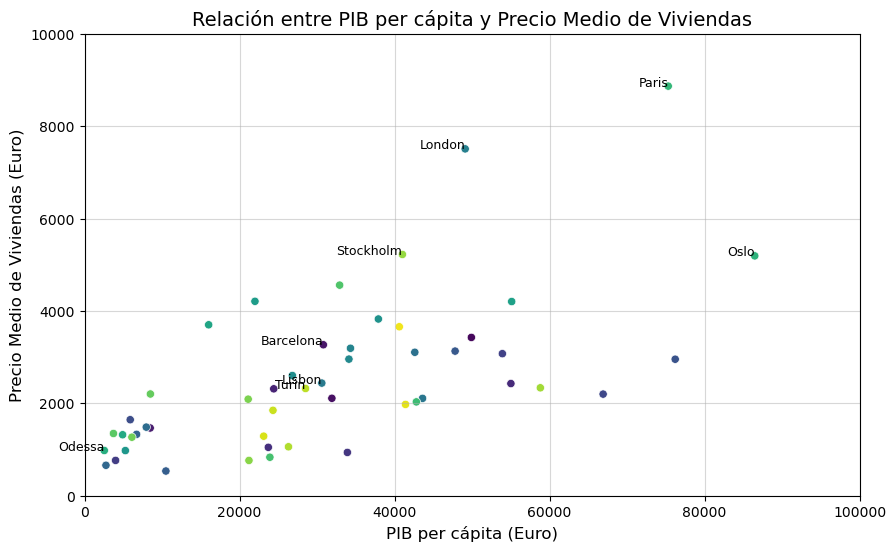

In [47]:
# Crear el gr√°fico de dispersi√≥n
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='PIB_PC', y='Media_Precios', hue='Ciudad', palette='viridis', legend=False)
plt.title('Relaci√≥n entre PIB per c√°pita y Precio Medio de Viviendas', fontsize=14)
plt.xlabel('PIB per c√°pita (Euro)', fontsize=12)
plt.ylabel('Precio Medio de Viviendas (Euro)', fontsize=12)
plt.ylim(0, 10000)
plt.xlim(0, 100000)
plt.grid(alpha=0.5)

# Calcular la correlaci√≥n
correlation, p_value = pearsonr(df2['PIB_PC'], df2['Media_Precios'])
print(f"Coeficiente de correlaci√≥n de Pearson: {correlation:.2f}")
print(f"Valor p: {p_value:.4f}")

# Identificar ciudades con valores m√≠nimo, m√°ximo, tres valores centrales y las m√°s caras
df2_sorted = df2.sort_values(by='PIB_PC')
ciudad_min = df2_sorted.iloc[0]['Ciudad']
ciudad_max = df2_sorted.iloc[-1]['Ciudad']
ciudades_medias = df2_sorted.iloc[len(df2_sorted)//2 - 1: len(df2_sorted)//2 + 2]['Ciudad'].tolist()

# Identificar las ciudades m√°s caras
df2_sorted_precio = df2.sort_values(by='Media_Precios', ascending=False)
ciudades_caras = df2_sorted_precio.iloc[:3]['Ciudad'].tolist()

print(f"Ciudad con PIB m√≠nimo: {ciudad_min}")
print(f"Ciudad con PIB m√°ximo: {ciudad_max}")
print(f"Tres ciudades con PIB intermedio: {ciudades_medias}")
print(f"Tres ciudades con precios m√°s altos: {ciudades_caras}")

# A√±adir anotaciones para las ciudades de inter√©s
ciudades_interes = [ciudad_min, ciudad_max] + ciudades_medias + ciudades_caras
for _, row in df2[df2['Ciudad'].isin(ciudades_interes)].iterrows():
    plt.text(row['PIB_PC'], row['Media_Precios'], row['Ciudad'], fontsize=9, ha='right', color='black')

# Guardar el gr√°fico en alta resoluci√≥n
plt.savefig('grafico_pib_precio.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()


El coeficiente de correlacion de Pearson significa que existe una relaci√≥n positiva moderada a fuerte entre las dos variables analizadass. El p-value de 0 indica que la probabilidad de que la correlaci√≥n observada entre las variables ocurra debido al azar es pr√°cticamente nula, por lo tanto rechazamos H0.

## Analisis demografico 


#### Como influye la densidad de poblacion en el area media de las viviendas? 

Analizo si las ciudades con mayor densidad tienen viviendas mas grandes o pequenias en promedio.

Hipotesis nula: no existe relacion entre la densidad de las ciudades y el area de las viviendas

Hipotesis alternativa: hay relacion entre la densidad y el area, es decir a mayor densidad de poblacion, mayor area de las viviendas


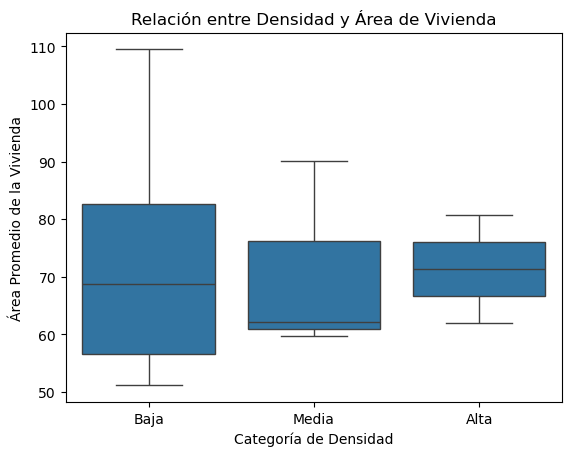

In [50]:
# Agrupando las ciudades en categor√≠as de densidad (por ejemplo, alta, media, baja)
df2['Densidad_Categoria'] = pd.cut(df2['Densidad Poblacional'], bins=3, labels=['Baja', 'Media', 'Alta'])

# Gr√°fico de caja
sns.boxplot(x='Densidad_Categoria', y='Media_Area', data=df2)
plt.xlabel('Categor√≠a de Densidad')
plt.ylabel('√Årea Promedio de la Vivienda')
plt.title('Relaci√≥n entre Densidad y √Årea de Vivienda')
plt.savefig('grafico_densidad_area.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
# Encontrar la densidad poblacional m√°xima y m√≠nima
max_densidad = df2["Poblacion"].max()
min_densidad = df2["Poblacion"].min()

# Filtrar las √°reas de vivienda correspondientes
area_max_densidad = df2.loc[df2["Poblacion"] == max_densidad, ["Ciudad", "Mediana_Area", "Media_Area"]]
area_min_densidad = df2.loc[df2["Poblacion"] == min_densidad, ["Ciudad", "Mediana_Area", "Media_Area"]]

print("Densidad poblacional m√°xima:")
print(area_max_densidad)
print("\nDensidad poblacional m√≠nima:")
print(area_min_densidad)


Densidad poblacional m√°xima:
      Ciudad  Mediana_Area  Media_Area
14  Istanbul         100.0   109.49038

Densidad poblacional m√≠nima:
     Ciudad  Mediana_Area  Media_Area
44  Tallinn          52.6   54.135061


In [52]:
from scipy.stats import f_oneway

# ANOVA entre las categor√≠as
stat, p = f_oneway(
    df2[df2['Densidad_Categoria'] == 'Baja']['Media_Area'],
    df2[df2['Densidad_Categoria'] == 'Media']['Media_Area'],
    df2[df2['Densidad_Categoria'] == 'Alta']['Media_Area']
)

print("Estad√≠stico F:", stat)
print("p-valor:", p)

Estad√≠stico F: 0.01673513150507465
p-valor: 0.9834099800792367


‚Ä¢  Estad√≠stico F: 0.0167: Esto indica que las diferencias entre las medias de las categor√≠as (Baja, Media, Alta) son extremadamente peque√±as. En otras palabras, las √°reas promedio de las viviendas no var√≠an significativamente entre las categor√≠as de densidad.
‚Ä¢  p-valor: 0.9834: Este valor es mucho mayor que el nivel de significancia t√≠pico (Œ±=0.05\alpha = 0.05Œ±=0.05), lo que significa que no hay evidencia estad√≠sticamente significativa para rechazar la hip√≥tesis nula.


In [57]:
ciudades = ["Barcelona", "Seville", "Valencia", "Madrid"]
df_filtrado = df2[df2['Ciudad'].isin(ciudades)][['Ciudad', 'Poblacion', 'Media_Area']]

# Establecer la columna 'Ciudad' como √≠ndice
df_filtrado = df_filtrado.set_index('Ciudad')

# Ordenar de mayor a menor seg√∫n la poblaci√≥n
df_filtrado = df_filtrado.sort_values(by='Poblacion', ascending=False)

# Mostrar el DataFrame resultante
print(df_filtrado)



           Poblacion  Media_Area
Ciudad                          
Madrid       3213271   82.711550
Barcelona    1615908   80.772769
Valencia      807200   96.502511
Seville       699759   87.254515


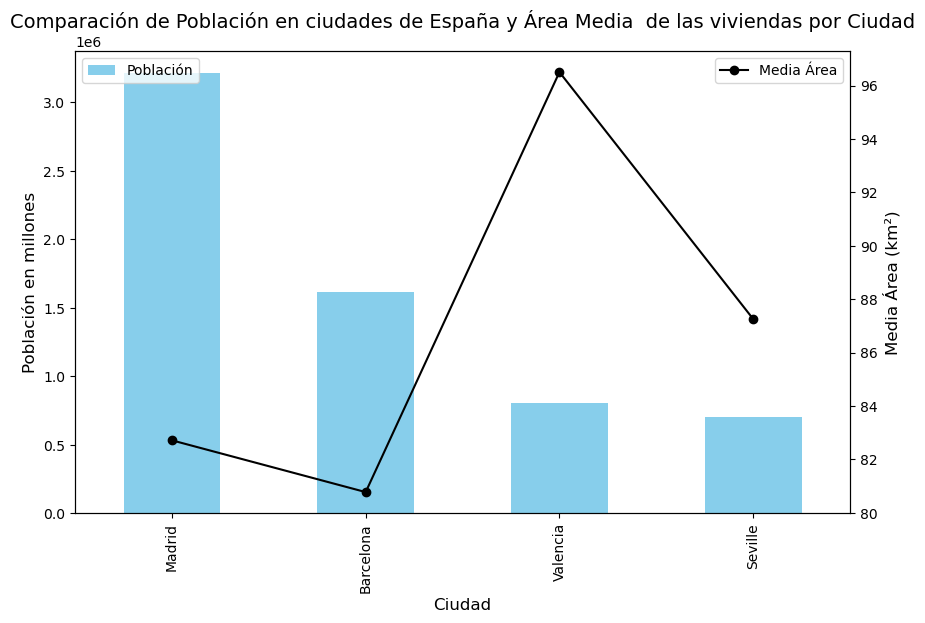

In [73]:
import matplotlib.pyplot as plt

# Crear gr√°fico de barras
df_filtrado = df_filtrado.sort_values(by='Poblacion', ascending=False)  # Ordenado para claridad
ax = df_filtrado['Poblacion'].plot(kind='bar', color='skyblue', figsize=(10, 6), legend=True, label='Poblaci√≥n')

# A√±adir el √°rea promedio como una l√≠nea
ax2 = ax.twinx()
df_filtrado['Media_Area'].plot(kind='line', color='black', marker='o', ax=ax2, legend=True, label='Media √Årea')

# T√≠tulos y etiquetas
ax.set_title('Comparaci√≥n de Poblaci√≥n en ciudades de Espa√±a y √Årea Media  de las viviendas por Ciudad', fontsize=14)
ax.set_xlabel('Ciudad', fontsize=12)
ax.set_ylabel('Poblaci√≥n en millones', fontsize=12)
ax2.set_ylabel('Media √Årea (km¬≤)', fontsize=12)

# Mostrar leyendas
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.savefig('grafico_ciudades_espanya.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()


## Analisis del mercado laboral

#### Las tasas de desempleo estan asociadas con las tasas de propiedad de las viviendas? 
Exploro si en ciudades con mayor desempleo hay menos propiedad de viviendas.

Hip√≥tesis Nula: No existe una relaci√≥n significativa entre la tasa de desempleo y la tasa de propiedad de viviendas.

Hip√≥tesis Alternativa: Existe una relaci√≥n significativa entre la tasa de desempleo y la tasa de propiedad de viviendas.

In [ ]:
#import matplotlib.pyplot as plt
import pandas as pd

# Preparar los datos
ciudades = df2['Ciudad']
propiedad = df2['Tasa de Propiedad de Vivienda']
desempleo = df2['Tasa de Desempleo']

# Crear un DataFrame auxiliar para ordenar los datos por una de las tasas (por ejemplo, propiedad)
df_aux = pd.DataFrame({
    'Ciudad': ciudades,
    'Propiedad': propiedad,
    'Desempleo': desempleo
}).sort_values(by='Propiedad', ascending=True)

# Extraer los valores ordenados
ciudades_ordenadas = df_aux['Ciudad']
propiedad_ordenada = df_aux['Propiedad']
desempleo_ordenada = df_aux['Desempleo']

# Crear el gr√°fico
x = range(len(ciudades_ordenadas))  # Posiciones de las ciudades en el eje X
plt.figure(figsize=(12, 6))

# Barras para la tasa de propiedad
plt.bar(x, propiedad_ordenada, width=0.4, label='Tasa de Propiedad de Vivienda (%)', color='lightblue', align='center')

# Barras para la tasa de desempleo (desplazadas ligeramente a la derecha)
plt.bar([i + 0.4 for i in x], desempleo_ordenada, width=0.4, label='Tasa de Desempleo (%)', color='steelblue', align='center')

# Personalizar
plt.title('Tasa de Desempleo y Propiedad de Vivienda por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Porcentaje (%)')

# Ajustar etiquetas en el eje X
plt.xticks([i + 0.2 for i in x], ciudades_ordenadas, rotation=65, ha='right')  # Rotaci√≥n y alineaci√≥n derecha

plt.legend()
plt.savefig('grafico_tasa_desempleo_propiedad.jpg', format='jpg', dpi=300, bbox_inches='tight')
# Mostrar
plt.tight_layout()  # Evitar que las etiquetas se solapen con los bordes
plt.show()




Coeficiente de correlaci√≥n de Pearson (r): -0.124
Esto indica una relaci√≥n negativa muy d√©bil entre la tasa de desempleo y la tasa de propiedad de viviendas.

Valor p: 0.659
Este valor p es significativamente mayor al nivel de significancia com√∫n (
ùõº=0.05), lo que significa que no podemos rechazar la hip√≥tesis nula

La conclusion es que no, no podemos decir que en ciudades con mayor desempleo haya menos propietarios

